# SymPy Demo 3: Linear Maps
Demo by Christian Mikkelstrup, Hans Henrik Hermansen, Karl Johan Måstrup Kristiansen, and Magnus Troen. *Revised 05-11-24 by shsp.*

In [ ]:
from sympy import *
init_printing()

## Kernel and Column Space

Let

$$
\mathbf{B} = \left[\begin{matrix}5 & 4 i & 3 + 5 i\\3 i & 2 & -3 + 4 i\\3 & 8 & 3 + 7 i\end{matrix}\right].
$$

In [ ]:
B = Matrix([[5, 4*I, 3+5*I], [3*I, 2, -3+4*I],[3, 8, 3+7*I]])
B

We determine the kernel $\operatorname{ker}\mathbf B$ using

In [ ]:
B.nullspace()

Hence $\operatorname{ker}\mathbf B = \operatorname{span}\left(\begin{bmatrix} -1-i \\ -\frac{i}{2} \\ 1 \end{bmatrix}\right).$

The column space and row space, $\operatorname{colsp}\mathbf B$ and $\operatorname{rowsp}\mathbf B$, can be computed by

In [ ]:
B.columnspace(), B.rowspace()

We see that we have:

$$
\operatorname{colsp}\mathbf B = \operatorname{span}\left(\left[\begin{matrix}5\\3 i\\3\end{matrix}\right], \  \left[\begin{matrix}4 i\\2\\8\end{matrix}\right]\right)
$$

$$
\operatorname{rowsp}\mathbf B = \operatorname{span}\left(\left[\begin{matrix}5 & 4 i & 3 + 5 i\end{matrix}\right], \  \left[\begin{matrix}0 & 22 & 11 i\end{matrix}\right] \right).
$$


Note: the dimensions of these spaces will be identical and equal to the rank of $\mathbf B$:

$$\operatorname{dim}(\operatorname{colsp}\mathbf B) = \operatorname{dim}(\operatorname{rowsp}\mathbf B) = \rho (\mathbf B).$$

## Linearity of Maps

We want to investigate weather a map is linear. To do this, we will examine the map $\boldsymbol f:\mathbb{R}^2 \to \mathbb{R}^4$ given by

$$\boldsymbol f(x_1,x_2)=(2\,x_1+x_2,\;3\,x_1+2\,x_2,\;x_1+x_2,\;2\,x_1+3\,x_2).$$

In [ ]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return Matrix([2*x1+x2, 3*x1+2*x2, x1+x2, 2*x1+3*x2])

We will use two methods to examine the lineariy of $\boldsymbol f$.

### Method 1 - Checking the Lineary Requirements Directly

A map is linear if it, for two arbitrary vectors $\mathbf u$ and $\mathbf v$ from its domain as well as an arbitrary constant $k$ from the field, satisfies the following two requirements:

$$
\begin{aligned}
& \boldsymbol f(\mathbf u+\mathbf v)=\boldsymbol f(\mathbf u)+\boldsymbol f(\mathbf v)\\
& \boldsymbol f(k\,\mathbf u)=k\,\boldsymbol f(\mathbf u).
\end{aligned}
$$

Find the relevant theorem in the course textbook where this is stated to confirm. To check whether these two requirements are fulfilled, we first define arbitrary vectors and a constant to work with:

In [ ]:
u1,u2,v1,v2,k = symbols('u_1,u_2,v_1,v_2,k')
u = Matrix([u1,u2])
v = Matrix([v1,v2])

u, v, k

Try inserting these arbitrary vectors into the map to ensure that everything is properly defined:

In [ ]:
f(u), f(v)

Now we check the linearity requirements:

In [ ]:
# Linearity requirement no. 1
f(u+v) - (f(u)+f(v))

In [ ]:
# Linearity requirement no. 2
simplify(f(k*u)-k*f(u))

We see clearly that $\boldsymbol f$ satisfies the criteria, so we conclude that $\boldsymbol f$ is linear.

### Method 2 - Finding the Mapping Matrix

If we can write the map $\boldsymbol f(\mathbf x)$ on matrix form like this:

$$
\boldsymbol f(\mathbf x)=\mathbf F\,\mathbf x
$$

for some matrix $\mathbf F\in \mathbb{R}^{m\times n}$, then $\boldsymbol f$ is linear (see the relevant theorem in the course textbook). The matrix $\mathbf F$ is what we often refer to as the mapping matrix - simply put, if a mapping matrix exists, then the map is linear.

We observe that $\boldsymbol f$ has the following matrix representation (with respect to the standard bases for $\mathbb{R}^2$ and $\mathbb{R}^4$):

$$
\begin{aligned}
\boldsymbol f(\mathbf x) = & \mathbf F\,\mathbf x\\
\begin{bmatrix}2\,x_1+x_2\\ 3\,x_1+2\,x_2\\ x_1+x_2\\ 2\,x_1+3\,x_2\end{bmatrix} = & \begin{bmatrix}2&1\\3&2\\1&1\\2&3\end{bmatrix} \begin{bmatrix}x_1\\x_2\end{bmatrix}.
\end{aligned}
$$

So, we have found a matrix $\mathbf F \in \mathbb{R}^{4\times 2}$ to be

$$
\mathbf F = \begin{bmatrix}2&1\\3&2\\1&1\\2&3\end{bmatrix},
$$

which is a matrix representation (a mapping matrix) of the map with respect to the standard basis. 

As a side note, observe that the columns are the images of the basis vectors from the domain $\mathbb R^2$, as they should be:

In [ ]:
f([1,0]),f([0,1])

We did all the above manually, but when using the standard basis then you can automate the process with the following, which utilizes the identity matrix `eye` - note that if a linear map is given, then it is always possible to find a matrix representation in this way:

In [ ]:
n = 2
m = 4
V = eye(n)
F = zeros(m,n)
for k in range(n):
    F[:,k] = f(V.col(k))
F

## Typical Scenarios for using the Mapping Matrix

Consider the map $\boldsymbol g:\mathbb{R}^3\to\mathbb{R}^4$, which with respect to the standard bases in $\mathbb{R}^3$ and $\mathbb{R}^4$ is given by its mapping matrix:

In [ ]:
G = Matrix([[1,3,1],[2,4,0],[1,1,-1],[-3,-1,5]])
G

Here follows five examples on how a problem kan be solved using this mapping matrix.

### Example 1 - Finding the Image of a Given Vector

We wish to find the image $\boldsymbol g(\mathbf v)$ of a given vector $\mathbf v$:

In [ ]:
v = Matrix([1,-2,5])

Since we have the mapping matrix, then this is easily done with a simple matrix-vector multiplication, because $\boldsymbol g(\mathbf v)=\mathbf G\mathbf v$:

In [ ]:

G*v

Hence $\boldsymbol g(\mathbf v) = (0,-6,-6,24)$.

### Example 2 - Investigating whether a Vector belongs to the Kernel

Does the following vector $\mathbf u$ belong to the kernel of $\boldsymbol g$?

In [ ]:
u = Matrix([-6,3,-3])

 If so, then $\boldsymbol g(\mathbf u)$ is the zero vector (see the definition of the kernel in the course textbook). Again this is done as a simple mapping of the vector:

In [ ]:

G*u

Hence $\mathbf u=(-6,3,-3)\in\operatorname{ker}\boldsymbol g$.

### Example 3 - Finding the Kernel of a Map

As we know, $\mathbf x\in \operatorname{ker}\boldsymbol g$ holds true *if and only if* $\boldsymbol g(\mathbf x)=\mathbf 0$. So the kernel of our map is found by solving the equation

$$
\mathbf G\,\mathbf x=\mathbf{0}.
$$

This can be done by reducing the mapping matrix:

In [ ]:
G.rref()

From here we can read the kernel to be

$$
\text{ker}\,\boldsymbol g=\text{span}((2,-1,1)).
$$

This agrees with the rank-nullity theorem, which states that

$$
\begin{aligned}
\text{dim}(\text{ker}\,\boldsymbol g) &= \text{dim}(\mathbb{R}^3)-\rho(\mathbf G)\\
&= 3-2 \\
&= 1.
\end{aligned}
$$

Another way to show this is

In [ ]:
G.gauss_jordan_solve(Matrix([0,0,0,0]))

*Check:* This gives us the same vector as when using the direct command:

In [ ]:
G.nullspace()

### Example 4 - Determining the Image Space

We know from the reduced matrix above that $\rho(\mathbf G)=\text{dim}(\boldsymbol g(\mathbb{R}^3))=2$. Therefore a basis for $\boldsymbol g(\mathbb R^3)$ - that is, a basis for the image space, which we can just call the image, of $\boldsymbol g$, also denoted $\operatorname{image}\boldsymbol g$ - needs to consist of two linearly independent vectors. Firstly, remember that all columns in $\mathbf G$ belong to the image - this becomes clear if we compute the matrix product $\mathbf G\cdot \mathbf e$ for each standard basis vector $\mathbf e$ for $\mathbb R^3$, which will result in a column in $\mathbf G$. So, finding two linearly independent vectors among the columns of $\mathbf G$ will suffice.

From the result of `G.rref()` above, which we will repeat here for the sake of the overview:


In [ ]:
G.rref()

we see that the first two columns in $\mathbf G$ are linearly independent, as that is where we find the pivots. Thus, we pluck out these first two columns from $\mathbf G$, and these constitute a basis for the image space:

In [ ]:
G

In [ ]:
G.col(0), G.col(1)

$$
\operatorname{image}\boldsymbol g=\boldsymbol g(\mathbb{R}^3) = \text{span}((1,2,1,-3),(3,4,1,-1)).
$$

Note that columns 1 and 3 also could have been used - in general the image can be expressed in infinite ways, and there are often several choices of linearly independent columns to choose from when choosing a basis.

The built-in command can also be used here:

In [ ]:
G.columnspace()

This SymPy command might return different vectors than those we plucked out from $\mathbf G$ above, but they will nevertheless span the same space!

### Example 5 - Determining whether a Vector belongs to the Image

Claiming that a given vector $\mathbf b$ belongs to the image space, so claiming that $\mathbf b \in \boldsymbol g(\mathbb{R}^3)$, means that there must exist a vector $\mathbf x \in \mathbb{R}^3$ such that $\boldsymbol g(\mathbf x)=\mathbf b$. To find out if such a vector $\mathbf x$ exists, we need to solve:

$$
\mathbf G\,\mathbf x=\mathbf b.
$$

First, we are given the vector $\mathbf b_1$:

In [ ]:
b1 = Matrix([1,2,1,-4])

Does it belong to the image of $\boldsymbol g$?

In [ ]:
T1 = Matrix.hstack(G,b1)

T1.rref()

This system clearly has no solution as the rref shows an inconsistent equation. Indeed, if we ask SymPy for a solution, we are given an empty set (or an error if you are using `G.gauss_jordan_solve(b1)`):

In [ ]:
linsolve((G,b1))

So, $\mathbf b_1$ does not belong to the image of $\boldsymbol g$.

Next, we are given the vector $\mathbf b_2$:

In [ ]:
b2 = Matrix([3,0,-3,15])

Does this one belong to the image of $\boldsymbol g$?

In [ ]:
T2 = Matrix.hstack(G,b2)

T2.rref()


Yes! The system has solutions, so $\mathbf b_2$ belongs to the image, and we can write $\mathbf b_2\in \boldsymbol g(\mathbb{R}^3)$. We can even see that $\mathbf b_2$ has the coordinates $(-6,3)$ w.r.t. the basis $((1,2,1,-3),(3,4,1,-1))$ for $\boldsymbol g(\mathbb R^3)$. We can also see the infinitely many vectors that are mapped to $\mathbf b_2$. These vectors have the form:

$$
(-6,3,0)+t\,(2,-1,1), \quad t\in\mathbb{R}.
$$

Now we can use `.gauss_jordan_solve()` without any error messages (or just `linsolve` as before):

In [ ]:
G.gauss_jordan_solve(b2), linsolve((G,b2))

## Changing Matrix Representation via Change of Basis

In the following, two examples on how to change a matrix representation by changing the basis are shown.

### Example 1 - Changing Matrix Representation from given Basis to Standard Basis

A basis $\gamma=((5,3),(-2,-1))$ is given. In this basis the linear map $\boldsymbol M: \mathbb{R}^2\to \mathbb{R}^2$ is defined by a matrix:

$$
_\gamma[\boldsymbol M]_\gamma=\begin{bmatrix}1&2\\3&4\end{bmatrix}.
$$

In [ ]:
yMy = Matrix([[1,2],[3,4]])
yMy

What is the matrix representation of $\boldsymbol M$ with respect to the standard basis?

We can denote the standard basis for $\mathbb R^2$ by $e = ((1,0),(0,1))$, and what we want to find is thus $_e[\boldsymbol M]_e$. For that we need two change-of-basis matrices; one that changes from $\gamma$ basis to $e$ basis, and another that changes from $e$ to $\gamma$. 

The change-of-basis matrix that changes from $\gamma$ basis to $e$ basis is denoted by $_e[\text{id}_V]_\gamma$. We are able to write up this matrix right away since it simply consists of the two $\gamma$ basis vectors as columns:


In [ ]:
eIy = Matrix([[5,-2],[3,-1]])
eIy

So, 

$$
_e[\text{id}_V]_\gamma=\begin{bmatrix}5&-2\\3&-1\end{bmatrix}.
$$

Conversely, the change-of-basis matrix switching from the standard $e$ basis to the $\gamma$ basis is found as the inverse of the above (see the course textbook for the details):

$$
_\gamma[\text{id}_V]_e=_e[\text{id}_V]_\gamma^{-1}.
$$

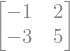

In [ ]:
yIe = eIy**-1
yIe

So, 

$$
_\gamma[\text{id}_V]_e=\begin{bmatrix}-1&2\\-3&5\end{bmatrix}.
$$

We now have all the tools prepared, and we can find $_e[\boldsymbol M]_e$ as follows:

$$
_e[\boldsymbol M]_e = _e[\text{id}_V]_\gamma \ _\gamma [\boldsymbol M]_\gamma \ _\gamma [\text{id}_V]_e.
$$

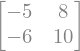

In [44]:
eMe = eIy * yMy * yIe
eMe

So, 

$$
_e[M]_e = \left[\begin{matrix}-5 & 8\\-6 & 10\end{matrix}\right].
$$

### Example 2 - Changing Matrix Representation from Standard Basis to another Basis

We will here reuse the basis $\gamma$ from above. In the standard basis $e$ the linear map $\boldsymbol K:\mathbb{R}^2\to \mathbb{R}^2$ is defined by the matrix representation

$$
_e[\boldsymbol K]_e=\begin{bmatrix}-2&0\\1&3\end{bmatrix}.
$$

In [ ]:
eKe = Matrix([[-2,0],[1,3]])

What is the matrix representation with respect to the $\gamma$ basis?

What we need to find is $_\gamma[\boldsymbol K]_\gamma$. Since we from the previous example already know the change-of-basis matrices between the $\gamma$ and $e$ bases, the matrix representation for $\boldsymbol K$ with respect to basis $\gamma$ is quickly found:

In [ ]:
yKy = yIe*eKe*eIy
yKy